# Sentiment Analysis Project
For this project, we'll perform the same type of NLTK VADER sentiment analysis, this time on our movie reviews dataset.

The 2,000 record IMDb movie review database is accessible through NLTK directly with
<pre>from nltk.corpus import movie_reviews</pre>

However, since we already have it in a tab-delimited file we'll use that instead.

## Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/Drive", force_remount=True)

base_path = "/content/Drive/My Drive/NLP-Course/04-Semantics-and-Sentiment-Analysis/"

Mounted at /content/Drive


## Load the Data

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv(base_path + 'moviereviews.tsv', sep='\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


## Check for Null Values

In [3]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [4]:
# Dropping Null Values
df.dropna(inplace=True)

# Reseting the Index
df.reset_index(inplace=True, drop=True)

In [5]:
df.isnull().sum()

label     0
review    0
dtype: int64

## Check for empty strings and remove them

In [6]:
blanks = []  # start with an empty list

for i, lb, rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

print(len(blanks), "found :", blanks)

27 found : [57, 71, 146, 150, 280, 304, 310, 320, 339, 347, 423, 496, 626, 668, 803, 838, 963, 1063, 1278, 1430, 1466, 1498, 1504, 1730, 1818, 1871, 1958]


In [7]:
df.drop(blanks, inplace=True)
df.shape

(1938, 2)

In [8]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

## Import `SentimentIntensityAnalyzer` and create an sid object
This assumes that the VADER lexicon has been downloaded.

In [9]:
!pip install twython
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
keys = ["neg", "neu", "pos", "compound"]

for key in keys:
    df[key] = df['review'].apply(lambda review: sid.polarity_scores(review)[key])

df.head()

,label,review,neg,neu,pos,compound
0,neg,how do films like mouse hunt get into theatres...,0.121,0.778,0.101,-0.9125
1,neg,some talented actresses are blessed with a dem...,0.120,0.775,0.105,-0.8618
2,pos,this has been an extraordinary year for austra...,0.067,0.783,0.150,0.9953
3,pos,according to hollywood movies made in last few...,0.069,0.786,0.145,0.9972
4,neg,my first press screening of 1998 and already i...,0.090,0.822,0.088,-0.7264


In [11]:
df['predictions'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

,label,review,neg,neu,pos,compound,predictions
0,neg,how do films like mouse hunt get into theatres...,0.121,0.778,0.101,-0.9125,neg
1,neg,some talented actresses are blessed with a dem...,0.120,0.775,0.105,-0.8618,neg
2,pos,this has been an extraordinary year for austra...,0.067,0.783,0.150,0.9953,pos
3,pos,according to hollywood movies made in last few...,0.069,0.786,0.145,0.9972,pos
4,neg,my first press screening of 1998 and already i...,0.090,0.822,0.088,-0.7264,neg


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

def classification_metrics(y_test, y_pred):
    # Calculating the Accuracy Score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy Score :", accuracy, "\n\n")

    # Classification Report
    print("Classification Report :\n")
    print(metrics.classification_report(y_test, y_pred), "\n\n")

    # Confusion Matrix
    conf_matx = metrics.confusion_matrix(y_test, y_pred)
    conf_matx_df = pd.DataFrame(conf_matx, index=["True neg", "True pos"], columns=["Predicted neg", "Predicted pos"])
    ## Using Heatmap plot to show the Confusion Matrix
    plt.figure(dpi=80)
    sns.heatmap(conf_matx_df, annot=True, fmt='.0f')
    plt.title("Confuion Matrix - Heatmap", fontdict={"fontsize": 12, "fontweight":"bold"})
    plt.show()

Accuracy Score : 0.6367389060887513 


Classification Report :

              precision    recall  f1-score   support

         neg       0.72      0.44      0.55       969
         pos       0.60      0.83      0.70       969

    accuracy                           0.64      1938
   macro avg       0.66      0.64      0.62      1938
weighted avg       0.66      0.64      0.62      1938
 




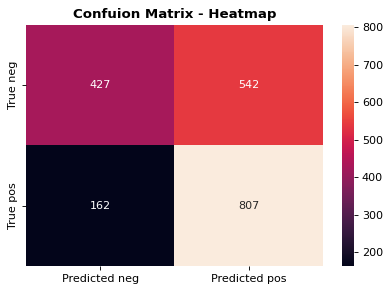

In [13]:
classification_metrics(df["label"], df["predictions"])

So, it looks like VADER couldn't judge the movie reviews very accurately. This demonstrates one of the biggest challenges in sentiment analysis - understanding human semantics. Many of the reviews had positive things to say about a movie, reserving final judgement to the last sentence.